In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import csv
import os
from os import path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
import cv2
from PIL import Image
from PIL import Image as im

In [ ]:
print(tf.__version__)

2.12.0


# **Directory Preparation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Original Image Data Directory
data_dir = "/content/drive/MyDrive/EyeGlasses Dataset"
train_dir = path.join(data_dir, 'training_set')
test_dir = path.join(data_dir, 'testing_set')

In [ ]:
class_names = os.listdir(train_dir)

In [ ]:
train_round_dir = os.path.join(train_dir, 'round')
train_rectangle_dir = os.path.join(train_dir, 'rectangle')
train_square_dir = os.path.join(train_dir, 'square')
train_oval_dir = os.path.join(train_dir, 'oval')

test_round_dir = os.path.join(test_dir, 'round')
test_rectangle_dir = os.path.join(test_dir, 'rectangle')
test_square_dir = os.path.join(test_dir, 'square')
test_oval_dir = os.path.join(test_dir, 'oval')

In [ ]:
#Label Encoding for each classes
class_name_encoded = { label: index for index, label in enumerate(class_names) }
print(class_name_encoded)

{'oval': 0, 'rectangle': 1, 'round': 2, 'square': 3}


In [ ]:
#Image Data Generator for Training Cropped Image Data
train_datagen = ImageDataGenerator(rescale=1/.255)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(325, 650))

#Image Data Generator for Testing Cropped Image Data (using original test image data)
test_datagen = ImageDataGenerator(rescale=1/.255)

test_generator = test_datagen.flow_from_directory(directory=test_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(325, 650))

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


# Image Preprocessing

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=650x325 at 0x7F667CF8B700> image_1.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=650x325 at 0x7F65DED1AB00> image_2.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=650x325 at 0x7F65DED1ABC0> image_3.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=650x325 at 0x7F65DED1A980> image_4.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=650x325 at 0x7F65DED1AB00> image_5.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=650x325 at 0x7F65DED1AB60> image_6.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=650x325 at 0x7F65DED1AA40> image_7.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=650x325 at 0x7F667CF8B670> image_8.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=650x325 at 0x7F65DED1AAA0> image_9.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=650x325 at 0x7F65DED1AC50> image_10.jpg


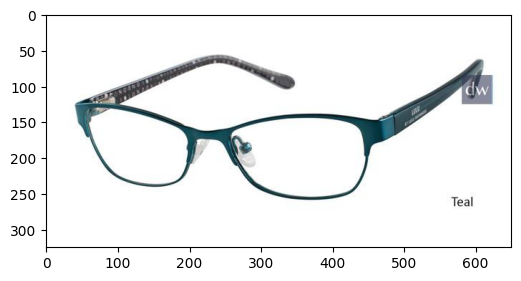

In [ ]:
#Loads image in from the set image path
counter = 1

while (counter<11):
  filename = "image_" + str(counter) + ".jpg"
  sample = os.path.join(train_rectangle_dir, filename)
  img = tf.keras.preprocessing.image.load_img(sample)
  print(img, filename)
  counter+=1

sample = os.path.join(train_rectangle_dir, 'image_10.jpg')
img = tf.keras.preprocessing.image.load_img(sample)
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)


# import cv2
# image = cv2.imread(sample)
# print(image.shape)

#Allows us to properly visualize our image by rescaling values in array
img_tensor /= 255.

#Plots image
plt.figure(figsize=(6,6))
plt.imshow(img_tensor[0])
plt.show()

# Modelling

In [ ]:
from tensorflow.keras.optimizers import RMSprop
# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY FACE SHAPES
  model = tf.keras.models.Sequential([ 
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(325, 650, 3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2), 
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
            tf.keras.layers.MaxPooling2D(2,2), 
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(), 
            # 512 neuron hidden layer
            tf.keras.layers.Dense(512, activation='relu'), 
            # 128 neuron hidden layer
            tf.keras.layers.Dense(128, activation='relu'),
            # 32 neuron hidden layer
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(4, activation='softmax')
          ])
  
  #Compile model
  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 

  return model #return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 323, 648, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 161, 324, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 159, 322, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 79, 161, 32)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 77, 159, 64)       18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 38, 79, 64)      

In [ ]:
# from PIL import ImageFile
model = create_model()
# ImageFile.LOAD_TRUNCATED_IMAGES = True
# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=test_generator)

Epoch 1/15
112/112 [==============================] - 908s 8s/step - loss: 136.4990 - accuracy: 0.5009 - val_loss: 1.2772 - val_accuracy: 0.4536
Epoch 2/15
112/112 [==============================] - 760s 7s/step - loss: 8.6332 - accuracy: 0.4826 - val_loss: 1.3616 - val_accuracy: 0.4518
Epoch 3/15
112/112 [==============================] - 757s 7s/step - loss: 1.5255 - accuracy: 0.6125 - val_loss: 0.8750 - val_accuracy: 0.6232
Epoch 4/15
112/112 [==============================] - 724s 6s/step - loss: 1.1947 - accuracy: 0.6915 - val_loss: 2.0865 - val_accuracy: 0.3464
Epoch 5/15
112/112 [==============================] - 757s 7s/step - loss: 0.5933 - accuracy: 0.7714 - val_loss: 1.5432 - val_accuracy: 0.6214
Epoch 6/15
112/112 [==============================] - 754s 7s/step - loss: 0.5911 - accuracy: 0.8107 - val_loss: 1.1082 - val_accuracy: 0.6482
Epoch 7/15
112/112 [==============================] - 752s 7s/step - loss: 0.4855 - accuracy: 0.8393 - val_loss: 1.2859 - val_accuracy: 0.58

# Transfer Learning

In [ ]:
# MobileNet
base_model=tf.keras.applications.MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=tf.keras.layers.Dense(1024,activation='relu')(x) #dense layer 2
x=tf.keras.layers.Dense(512,activation='relu')(x) #dense layer 3
preds=tf.keras.layers.Dense(4,activation='softmax')(x) #final layer with softmax activation

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model=tf.keras.models.Model(inputs=base_model.input,outputs=preds)

In [ ]:
# Print out the model architecture
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_1
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

In [ ]:
for layer in model.layers:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 

In [ ]:
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=test_generator)

Epoch 1/15
112/112 [==============================] - 598s 5s/step - loss: 1.0166 - accuracy: 0.6103 - val_loss: 2.6039 - val_accuracy: 0.4036
Epoch 2/15
112/112 [==============================] - 30s 270ms/step - loss: 0.5076 - accuracy: 0.8103 - val_loss: 6.7074 - val_accuracy: 0.2768
Epoch 3/15
112/112 [==============================] - 30s 269ms/step - loss: 0.3801 - accuracy: 0.8629 - val_loss: 1.5381 - val_accuracy: 0.5732
Epoch 4/15
112/112 [==============================] - 30s 270ms/step - loss: 0.3216 - accuracy: 0.8728 - val_loss: 2.1470 - val_accuracy: 0.5571
Epoch 5/15
112/112 [==============================] - 31s 280ms/step - loss: 0.3087 - accuracy: 0.8808 - val_loss: 0.9749 - val_accuracy: 0.7500
Epoch 6/15
112/112 [==============================] - 33s 290ms/step - loss: 0.2593 - accuracy: 0.8982 - val_loss: 0.8066 - val_accuracy: 0.7679
Epoch 7/15
112/112 [==============================] - 31s 278ms/step - loss: 0.2308 - accuracy: 0.9205 - val_loss: 0.7431 - val_accu

In [ ]:
path = "/content/drive/MyDrive/Models/Glasses/"
filename = 'model.h5'
model.save(path + filename)

In [ ]:
# MobileNetV2
base_model_2=tf.keras.applications.MobileNetV2(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model_2.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=tf.keras.layers.Dense(1024,activation='relu')(x) #dense layer 2
x=tf.keras.layers.Dense(512,activation='relu')(x) #dense layer 3
preds=tf.keras.layers.Dense(4,activation='softmax')(x) #final layer with softmax activation

model_2=tf.keras.models.Model(inputs=base_model_2.input,outputs=preds)

for i,layer in enumerate(model_2.layers):
  print(i,layer.name)

9406464/9406464 [==============================] - 0s 0us/step
0 input_2
1 Conv1
2 bn_Conv1
3 Conv1_relu
4 expanded_conv_depthwise
5 expanded_conv_depthwise_BN
6 expanded_conv_depthwise_relu
7 expanded_conv_project
8 expanded_conv_project_BN
9 block_1_expand
10 block_1_expand_BN
11 block_1_expand_relu
12 block_1_pad
13 block_1_depthwise
14 block_1_depthwise_BN
15 block_1_depthwise_relu
16 block_1_project
17 block_1_project_BN
18 block_2_expand
19 block_2_expand_BN
20 block_2_expand_relu
21 block_2_depthwise
22 block_2_depthwise_BN
23 block_2_depthwise_relu
24 block_2_project
25 block_2_project_BN
26 block_2_add
27 block_3_expand
28 block_3_expand_BN
29 block_3_expand_relu
30 block_3_pad
31 block_3_depthwise
32 block_3_depthwise_BN
33 block_3_depthwise_relu
34 block_3_project
35 block_3_project_BN
36 block_4_expand
37 block_4_expand_BN
38 block_4_expand_relu
39 block_4_depthwise
40 block_4_depthwise_BN
41 block_4_depthwise_relu
42 block_4_project
43 block_4_project_BN
44 block_4_add
45 

In [ ]:
for layer in model_2.layers:
    layer.trainable=False
for layer in model_2.layers[-5:]:
    layer.trainable=True

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model_2.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 

In [ ]:
history_2 = model_2.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=test_generator)

Epoch 1/15
112/112 [==============================] - 35s 278ms/step - loss: 1.0653 - accuracy: 0.5487 - val_loss: 0.7523 - val_accuracy: 0.6446
Epoch 2/15
112/112 [==============================] - 27s 244ms/step - loss: 0.6902 - accuracy: 0.7009 - val_loss: 0.5828 - val_accuracy: 0.7464
Epoch 3/15
112/112 [==============================] - 27s 238ms/step - loss: 0.5832 - accuracy: 0.7446 - val_loss: 0.6269 - val_accuracy: 0.6946
Epoch 4/15
112/112 [==============================] - 28s 248ms/step - loss: 0.5241 - accuracy: 0.7746 - val_loss: 0.6052 - val_accuracy: 0.7143
Epoch 5/15
112/112 [==============================] - 28s 248ms/step - loss: 0.4882 - accuracy: 0.7942 - val_loss: 0.5629 - val_accuracy: 0.7375
Epoch 6/15
112/112 [==============================] - 33s 297ms/step - loss: 0.4774 - accuracy: 0.7991 - val_loss: 0.6840 - val_accuracy: 0.6929
Epoch 7/15
112/112 [==============================] - 29s 258ms/step - loss: 0.4335 - accuracy: 0.8147 - val_loss: 0.6220 - val_ac

In [ ]:
path = "/content/drive/MyDrive/Models/Glasses/"
filename = 'model_2.h5'
model_2.save(path + filename)

In [ ]:
# Fine-tuned MobileNetV2
base_model_2=tf.keras.applications.MobileNetV2(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model_2.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=tf.keras.layers.Dense(1024,activation='relu')(x) #dense layer 2
x=tf.keras.layers.Dense(512,activation='relu')(x) #dense layer 3
preds=tf.keras.layers.Dense(4,activation='softmax')(x) #final layer with softmax activation

model_3=tf.keras.models.Model(inputs=base_model_2.input,outputs=preds)

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
model_3.trainable = True
for layer in model_3.layers[:100]:
  layer.trainable =  False

In [ ]:
len(base_model_2.layers)

154

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model_3.compile(optimizer=RMSprop(learning_rate=0.00001),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 

In [ ]:
history_3 = model_3.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=test_generator)

Epoch 1/15
112/112 [==============================] - 1360s 12s/step - loss: 1.0112 - accuracy: 0.6415 - val_loss: 1.3685 - val_accuracy: 0.2857
Epoch 2/15
112/112 [==============================] - 31s 274ms/step - loss: 0.6148 - accuracy: 0.8062 - val_loss: 1.2890 - val_accuracy: 0.2786
Epoch 3/15
112/112 [==============================] - 32s 283ms/step - loss: 0.4339 - accuracy: 0.8402 - val_loss: 1.2348 - val_accuracy: 0.3125
Epoch 4/15
112/112 [==============================] - 31s 276ms/step - loss: 0.3469 - accuracy: 0.8759 - val_loss: 1.2231 - val_accuracy: 0.3411
Epoch 5/15
112/112 [==============================] - 30s 271ms/step - loss: 0.2819 - accuracy: 0.9018 - val_loss: 1.2265 - val_accuracy: 0.3321
Epoch 6/15
112/112 [==============================] - 31s 279ms/step - loss: 0.2428 - accuracy: 0.9121 - val_loss: 1.1080 - val_accuracy: 0.4411
Epoch 7/15
112/112 [==============================] - 32s 284ms/step - loss: 0.1999 - accuracy: 0.9308 - val_loss: 1.0820 - val_ac

In [ ]:
path = "/content/drive/MyDrive/Models/Glasses/"
filename = 'model_3.h5'
model_3.save(path + filename)

In [ ]:
# Fine-tuned MobileNetV2
base_model_2=tf.keras.applications.MobileNetV2(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model_2.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=tf.keras.layers.Dense(1024,activation='relu')(x) #dense layer 2
x=tf.keras.layers.Dense(512,activation='relu')(x) #dense layer 3
x = tf.keras.layers.Dropout(0.2)(x)
preds=tf.keras.layers.Dense(4,activation='softmax')(x) #final layer with softmax activation

model_4=tf.keras.models.Model(inputs=base_model_2.input,outputs=preds)

9406464/9406464 [==============================] - 2s 0us/step


In [ ]:
model_4.trainable = True
for layer in model_4.layers[:100]:
  layer.trainable =  False

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model_4.compile(optimizer=RMSprop(learning_rate=0.00001),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 

In [ ]:
history_4 = model_4.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=test_generator)

Epoch 1/15
112/112 [==============================] - 929s 8s/step - loss: 1.0866 - accuracy: 0.5594 - val_loss: 1.3114 - val_accuracy: 0.3893
Epoch 2/15
112/112 [==============================] - 879s 8s/step - loss: 0.6834 - accuracy: 0.7554 - val_loss: 1.2939 - val_accuracy: 0.3500
Epoch 3/15
112/112 [==============================] - 895s 8s/step - loss: 0.4933 - accuracy: 0.8188 - val_loss: 1.1965 - val_accuracy: 0.4107
Epoch 4/15
112/112 [==============================] - 890s 8s/step - loss: 0.3871 - accuracy: 0.8589 - val_loss: 1.1206 - val_accuracy: 0.4607
Epoch 5/15
112/112 [==============================] - 886s 8s/step - loss: 0.3088 - accuracy: 0.8871 - val_loss: 1.0863 - val_accuracy: 0.4857
Epoch 6/15
112/112 [==============================] - 896s 8s/step - loss: 0.2735 - accuracy: 0.8924 - val_loss: 0.9969 - val_accuracy: 0.5625
Epoch 7/15
112/112 [==============================] - 890s 8s/step - loss: 0.2340 - accuracy: 0.9165 - val_loss: 0.9264 - val_accuracy: 0.6054